Models used in this assignment

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

#Used for task A1
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

#used for task A2
from nltk import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#used for task B1
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.cluster import KMeans

#used in part B2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import LatentDirichletAllocation

#used in task B3
import spacy
import pytextrank
from gensim.summarization.summarizer import summarize

%matplotlib inline

For the first task of the assignment we are using a drug review dataset. The datset can be downloaded under the following link: http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29.

In [2]:
data = pd.read_csv('/Users/joel/Desktop/drugLib_raw/drugLibTrain_raw.tsv', sep='\t')

In [3]:
data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


 For the following tasks we considere just the column "SideEffectsReview"

In [4]:
X = data['sideEffectsReview']

In [5]:
X[1]

"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Long Lasting Cycles. It's only been 5 1/2 months, but i'm concidering changing to a different bc. This is my first time using any kind of bc, unfortunately due to the constant hassel, i'm not happy with the results."

Above we see an output of a row in our dataset. Typically people write down their side effects and how much or how long they have taken a drug. We can see each single review as a document while X is then a collection of documents

#### Task 1: Building a pipeline to remoce punctuation and stopwords. As well we want to tokenize the data. The result should be a list of bi-grams

In [6]:
# a class to clean the text data
# 1. A sentence or several sentences are tokenized in a list of separeted elements rowise
# 2. For each list punctuations are removed
# 3. returns a cleaned list
class CleanText():
    
    def __init__(self):
        return
        
    def fit(self, X, y = None):
        return self
    
    def clean_punctuation(self, x):
        
        #returns a list with tokinized words. Each string is a seperate element of the list
        x = str(x)
        w = word_tokenize(x)
        
        #removes all non alphabetic characters
        clean_list = [i for i in w if i.isalpha()]
        
        return clean_list
    
    def transform(self, X, y = None):
        
        l = []
        
        for i in X:
            
            cp = self.clean_punctuation(i)
            l.append(cp)
        
        
        return l 

In [7]:
# a class to remove stopwords
#uses the stopwords from nltk

class Stop():
    
    def __init__(self, language):
        self.lang = language
        
    def fit(self, X, y = None):
        return self
    
    def remove_stop_words(self, x):
        cleaned_list = [w for w in x if not w in stopwords.words(self.lang)]
        return cleaned_list
    
    def transform(self, X, y = None):
        l = []
        for i in X:
            cleaned_sublist = self.remove_stop_words(i)
            l.append(cleaned_sublist)
        
        return l
    

In [8]:
# a class to generate n-grams
# returns a nested list where each sublist is a list of n-grams for a document
class NGram():
    
    def __init__(self, n):
        self.n = n
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y=None):
        ngram_total_list = []
        for i in range(0, len(X)):
            ngram = ngrams(X[i], n = self.n)
            
            ngram = list(ngram)
            
            ngram_total_list.append(ngram)
            
        return ngram_total_list

In [9]:
pipe = Pipeline([("Remove_Punktuation", CleanText()),
                 ("Stopwords", Stop('english')),
               ("NGram", NGram(2))])

In [10]:
pipe_result = pipe.fit_transform(X)

In [11]:
pipe_result[1]

[('Heavy', 'Cycle'),
 ('Cycle', 'Cramps'),
 ('Cramps', 'Hot'),
 ('Hot', 'Flashes'),
 ('Flashes', 'Fatigue'),
 ('Fatigue', 'Long'),
 ('Long', 'Lasting'),
 ('Lasting', 'Cycles'),
 ('Cycles', 'It'),
 ('It', 'months'),
 ('months', 'concidering'),
 ('concidering', 'changing'),
 ('changing', 'different'),
 ('different', 'bc'),
 ('bc', 'This'),
 ('This', 'first'),
 ('first', 'time'),
 ('time', 'using'),
 ('using', 'kind'),
 ('kind', 'bc'),
 ('bc', 'unfortunately'),
 ('unfortunately', 'due'),
 ('due', 'constant'),
 ('constant', 'hassel'),
 ('hassel', 'happy'),
 ('happy', 'results')]

For the first Task we removed stopwords and tokenized the text. Then we built bigrams for each document. Above we see the result. We have a nested list where each individual list is a collection of bigrams for a document

#### Task 2: Split the corpus into sentences and vectorize it into a bag of words and TF-ID

In [12]:
X[1]

"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Long Lasting Cycles. It's only been 5 1/2 months, but i'm concidering changing to a different bc. This is my first time using any kind of bc, unfortunately due to the constant hassel, i'm not happy with the results."

In [13]:
# a class to create sentences out of the text
# the function is to each document found in the pandas dataframe. A document is a single row
class text2sentence():
    
    def __init__(self):
        return
    
    def fit(self, X, y = None):
        return self
    
    def sentence(self, x):
        x = str(x)
        s = sent_tokenize(x)
        
        return s
    
    def transform(self, X, y = None):
        
        
        X_sentence = [self.sentence(w) for w in X]
        return X_sentence 
        

In [14]:
# a class for the bag of words model
# this class returns to arguments
# It returns the vector space model and the corresbonding names for each vector
class BagOfWords():
    
    def __init__(self):
        self.vectorizer = CountVectorizer(analyzer='word', lowercase = True)
        
    def fit(self, X, y = None):

        return self
    
    def transform(self, X, y = None):

        bow_transform = self.vectorizer.fit_transform(X)
        names_of_vectors = self.vectorizer.get_feature_names()
        
        return bow_transform, names_of_vectors

In [15]:
# a class to flatten a nested list into a list
# This is necessary if we split our data into sentences befor applying the bag of words algorithm on the data
class Flatten():
    def __init__(self):
        return
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        flatten = [item for sublist in X for item in sublist]
        
        return flatten   

In [16]:
''' a class to lower case capitalized words. As well this class merges sub lists to a string
 Used before applying bag of Words or TF-ID '''

class Lower():
    def __init__(self):
        return
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        lower_list = []
        for i in X:
            X_actual = i
            lower = [x.lower() for x in X_actual]
            lower_list.append(lower)
        
        list_of_list_to_string = [' '.join(l) for l in lower_list]
                          
        return list_of_list_to_string

In [17]:
# this class returns to arguments
# It returns the vector space model and the corresbonding names for each vector
# this class returns to arguments
# It returns the vector space model and the corresbonding names for each vector
class TF_ID():
    
    def __init__(self):
        self.vectorizer = TfidfVectorizer(analyzer='word')
        
    def fit(self, X, y = None):
        
        return self
    
    def transform(self, X, y = None):

        tfid_transform = self.vectorizer.fit_transform(X)
        names_of_vectors = self.vectorizer.get_feature_names()
        
        return tfid_transform, names_of_vectors


In [18]:
pipe_1 = Pipeline([
                ("Sentences", text2sentence()),
                 ("Flatten", Flatten()),
                 ("BoW", BagOfWords())])

#we applied a flatten function to merge sublist into a list. 
#We need to do this to allow to apply BoW on the complete corpus and not just one a singe document

In [19]:
pipe_result_1, names_bow = pipe_1.fit_transform(X)

In [20]:
bow_matrix = pd.DataFrame(pipe_result_1.toarray(), columns = names_bow)
bow_matrix.head()

,00,000,000mg,025,05,07,08,10,100,1000,...,zithromycin,zofran,zoloft,zombie,zombing,zomig,zone,zyban,zyprexa,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For better demonstration we built a class for bag of words, which also returns us the names. With this we can build a dataframe which shows in for each row a document and the each column counts the appeareance of the word. As we see the result is a very sparse matrix. Also we notice that we just splitted the original corpus into sentences and applied directly a a bag of words algorithm on it. As result we also have strings / words as 00, 000mg and other values. For later tasks we may will clean this as well, but in this exercise it would be out of scope

In [21]:
#Pipeline for TF-ID
pipe_2 = Pipeline([
                 ("Sentences", text2sentence()),
                 ("Flatten", Flatten()),
                 ("TFID", TF_ID())])

In [22]:
pipe_result_2, names = pipe_2.fit_transform(X)

In [23]:
document_term_matrix = pd.DataFrame(pipe_result_2.toarray(), columns = names)

In [24]:
document_term_matrix.head()

,00,000,000mg,025,05,07,08,10,100,1000,...,zithromycin,zofran,zoloft,zombie,zombing,zomig,zone,zyban,zyprexa,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For better visualization of the result we constructed a data frame out of the TF-ID matrix. As we see above we are dealing with a very sparse matrix where most of the elements are zeros. As seen in the BoW we have again also numbers in our result. Again we have to mention here that in a later usage we not will keep them

# Part B

For the second part of the assignment we not directly use the same pipeline as we consotructed before. We will skip some steps and add some more. In detail we will skip the step splitting long strings into sentences. We have to remember that each row is a document and for each document we have predefined label. If we would split inside our documents the text into sentences we would have for each document a several lists

#### Task 1

#### Classification
We construct two models for text classification. We are using the well known k-NN algorithm and AdaBoost. The hyperparameters are number of k and the number of estimators. The hyperparameter for each model is selected by the result of the validation curve

Our hypothesis is, that we can classify the severity of side effects based on the review comment

In [25]:
# a class which we will use to transform a sparse matrix into a easy readable numpy matrix
# Just transform the input into a numpy array
class NotSparse():
    
    def __init__(self):
        return
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X.toarray()

The dataset we use comes already with at separated training and test part. So we will not apply a training test split

In [26]:
drug_data_train = pd.read_csv('/Users/joel/Desktop/drugLib_raw/drugLibTrain_raw.tsv', sep='\t')
drug_data_test = pd.read_csv('/Users/joel/Desktop/drugLib_raw/drugLibTest_raw.tsv', sep='\t')

In [27]:
# map the strings to numerical labels
effects_ground_truth = {"No Side Effects": 0, "Mild Side Effects": 1, "Moderate Side Effects": 2, "Extremely Severe Side Effects": 4, "Severe Side Effects": 3}
ground_truth = drug_data_train['sideEffects'].map(effects_ground_truth)

The dataset comes with a very unbalanced distribution of the side effects. To avoid this we will restrict the algorithm to just three classes. Mild and Moderate side effects will be one class and Serve and Extreme Side effects will build another class. No side effects will be untouched

In [28]:
# map the strings to numerical labels
effects = {"No Side Effects": 0, "Mild Side Effects": 1, "Moderate Side Effects": 1, "Extremely Severe Side Effects": 2, "Severe Side Effects": 2}
y_label = drug_data_train['sideEffects'].map(effects)
y_label_test = drug_data_test['sideEffects'].map(effects)

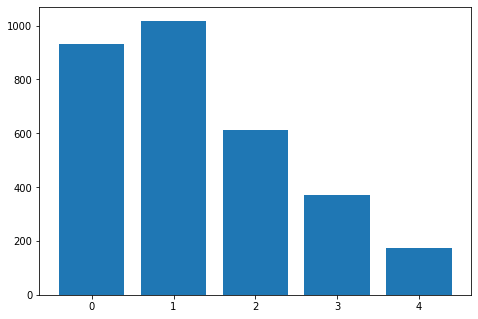

In [29]:
unique, counts = np.unique(ground_truth, return_counts=True)
frequence = dict(zip(unique, counts))

f = np.array([frequence[0], frequence[1], frequence[2], frequence[3], frequence[4]])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
b = ["0", "1", "2", "3", "4"]
h = f
ax.bar(b,h)
plt.show()

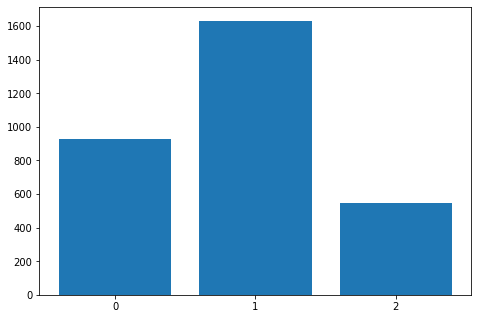

In [30]:
unique, counts = np.unique(y_label, return_counts=True)
frequence = dict(zip(unique, counts))

f = np.array([frequence[0], frequence[1], frequence[2]])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
b = ["0", "1", "2"]
h = f
ax.bar(b,h)
plt.show()

The dataset is imbalanced. We have a lot of datapoints with no or just mild side effects, while just a few datapoints are corresponding to extreme side effects.
We see the plots of the results before and after we changed the labels. Indeed the result is not perfect and labels are partly still imbalanced, but the result is already much better than before

In [31]:
y_train = y_label.values
y_test = y_label_test.values

In [32]:
# creating the data
X_train = drug_data_train['sideEffectsReview'].values
X_test = drug_data_test['sideEffectsReview'].values

#### Pipeline classification workflow

The following workflow shows how the pipeline works.
1. remove punctuations
2. remove stopwords

> After we removed punctuations and stopwords each document is a list of words. In the next step we have to merge the single documents into one corpus to apply transform it into a vector space model

3. lower capitalized letters (We do this to avoid that the same word, where just the capitalized letter is the difference, is counted differently
4. create a TF-ID matrix
5. transfrom a sparse matrix into a numpy matrix (the TFID matrix is very sparse. To avoid memory problems the result is saved in a sparse format, this unfortunatelly does not allows directly to apply a ml algorithm. To avoid this we transform it into a numpy array)

In [33]:
base_pipeline = Pipeline([("Remove_Punktuation", CleanText()),
                         ("Stopwords", Stop('english')),
                         ("Lower", Lower()),
                          ("TFID", TfidfVectorizer(analyzer='word')),
                         ("Matrix", NotSparse())])

In [34]:
X_processed = base_pipeline.fit_transform(X_train)

In [35]:
X_processed.shape

(3107, 6525)

The pipeline returns a numpy array. Each row of the array is a document and each column counts the appereance of the term in the complete corpus (all the documents). We see that it results into a matrix with high dimension

##### kNN Classifier
For the classification we apply k neirest neighbor algorithm to our dataset. As hyperparamter we choose k the number of neighbors. The question we face is the optimal number of k. In the appendix (after this task we plotted the validation curve to find the right hyperparamter k)

In [36]:
pipeline_kNN = Pipeline([("base", base_pipeline),
                        ("kNN", KNeighborsClassifier(algorithm = 'brute', n_neighbors = 17, n_jobs = 3))])

In [37]:
pipeline_kNN.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('base',
                 Pipeline(memory=None,
                          steps=[('Remove_Punktuation',
                                  <__main__.CleanText object at 0x7fc940286e50>),
                                 ('Stopwords',
                                  <__main__.Stop object at 0x7fc940286a90>),
                                 ('Lower',
                                  <__main__.Lower object at 0x7fc940286c90>),
                                 ('TFID',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8...
                                                  stop_words=None,
                                                  strip_accents=None,
                                                

In [38]:
y_pred = pipeline_kNN.predict(X_test)

In [39]:
pipeline_kNN.score(X_test, y_test)

0.6206563706563707

Achieved score of kNN

In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[227  41   0]
 [168 396   2]
 [ 67 115  20]]


[]

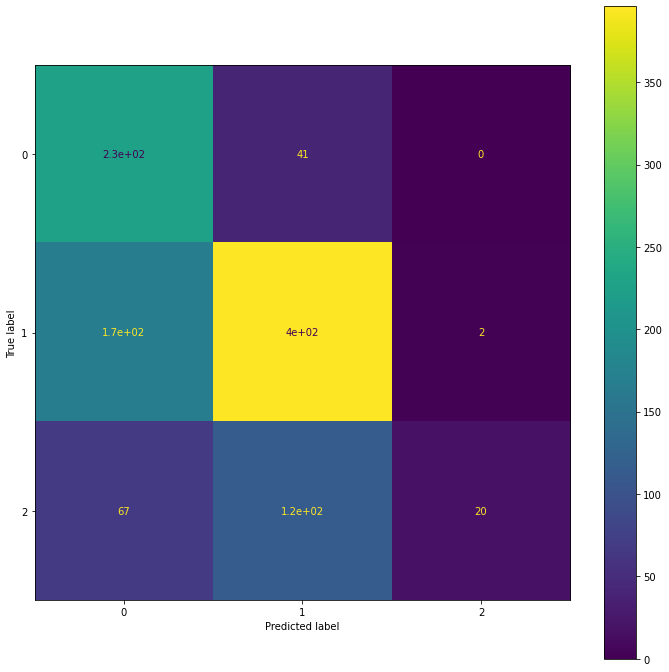

In [41]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(pipeline_kNN, X_test, y_test, display_labels = [0,1,2], ax=ax)
plt.plot()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.85      0.62       268
           1       0.72      0.70      0.71       566
           2       0.91      0.10      0.18       202

    accuracy                           0.62      1036
   macro avg       0.71      0.55      0.50      1036
weighted avg       0.70      0.62      0.58      1036



The kNN algorithm achieves a high precision in classifying comments which are labeld with serve or extreme side effects. Unfortunately the recall for this labels is low. So we can conclude that we have a small false positive rate (means most serve / extreme side effects are classified correctly) but also a lot of comments which are false negative. When our model predicts serve or extreme side effects it is with 91% correct, but just 10% (recall) are correctly classified based on all comments. This tradeoff is better for labels 0 and 1

#### Try with adaboost

In [43]:
pipeline_ada = Pipeline([("base", base_pipeline),
                        ("Ada", AdaBoostClassifier(n_estimators = 20))])

In [44]:
pipeline_ada.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('base',
                 Pipeline(memory=None,
                          steps=[('Remove_Punktuation',
                                  <__main__.CleanText object at 0x7fc940286e50>),
                                 ('Stopwords',
                                  <__main__.Stop object at 0x7fc940286a90>),
                                 ('Lower',
                                  <__main__.Lower object at 0x7fc940286c90>),
                                 ('TFID',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8...
                                                  smooth_idf=True,
                                                  stop_words=None,
                                                  s

In [45]:
y_pred_ada = pipeline_ada.predict(X_test)

In [46]:
pipeline_ada.score(X_test, y_test)

0.6891891891891891

In [47]:
cm2 = confusion_matrix(y_test, y_pred_ada)
print(cm2)

[[191  72   5]
 [ 67 454  45]
 [  8 125  69]]


[]

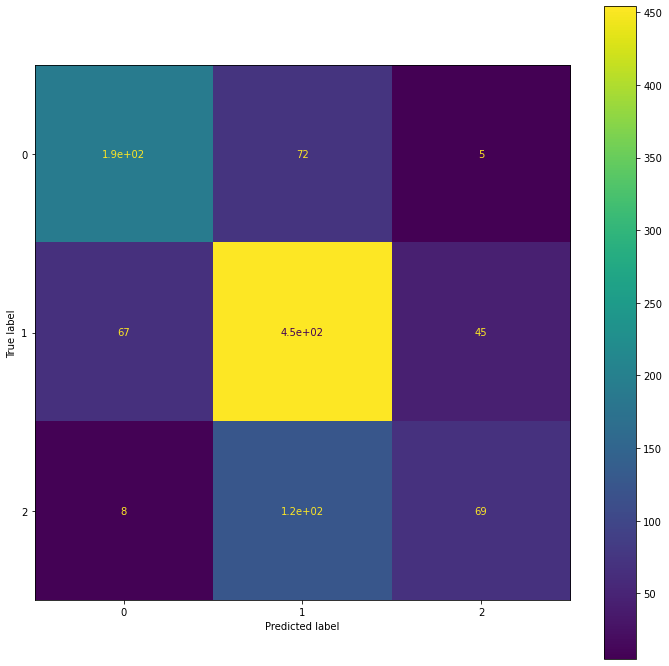

In [48]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(pipeline_ada, X_test, y_test, display_labels = [0,1,2], ax=ax)
plt.plot()

In [49]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       268
           1       0.70      0.80      0.75       566
           2       0.58      0.34      0.43       202

    accuracy                           0.69      1036
   macro avg       0.67      0.62      0.63      1036
weighted avg       0.68      0.69      0.68      1036



Above we see the result of the adaboost algorithm. For label 2 (Serve / Extreme Side effects) the kNN achieved a higher precision. We are in an interesting situation since recall is for adaboost for label 2 significantly higher than for the kNN. Therefor if adaboost classify data with label 2 in just 58% of the cases is correct, but 34% of all the serve / extreme side effects reviews are classified correcty. In general we can say that adaboost performs better because for label 0 and 1 precision and recall are higher.
If we focuse on the accuracy we see that the adaboost performs better than the kNN.

# Appendix

Code is taken from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py

The code was modified to meet the requirements here. Depending on the system it can take time to run the code (For a MacBook Air (Intel) ~20min) 

## Right hyperparameter kNN

In [50]:
from sklearn.model_selection import validation_curve

In [51]:
k = np.array(range(1, 25, 2))

In [52]:
k

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [53]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(n_jobs = 3), X_processed, y_train, "n_neighbors", k, cv=3)

In [54]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

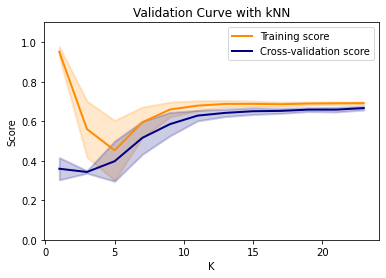

In [55]:
plt.title("Validation Curve with kNN")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(k, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(k, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(k, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(k, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Right hyperparameter Random Forrest

In [56]:
tree = np.array(range(1, 25))

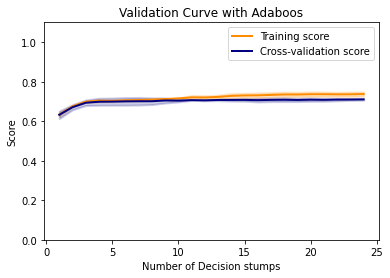

In [57]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(), X_processed, y_train, "n_estimators", tree, cv=3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Adaboos")
plt.xlabel("Number of Decision stumps")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(tree, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(tree, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(tree, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(tree, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### Clustering

It can be interesting to cluster comments by the side effect. So we could with out knowing the serverity on a scale we could gain this information just by clustering the comment into a category.
To perform clustering we use the same base pipeline as for classification. For clustering itself we are using the K-Means algorithm. We decide to use three predifined clusters as already in the classification task

In [58]:
# labels (just to remember)
np.unique(y_train)

array([0, 1, 2])

In [64]:
pipeline_kMean = Pipeline([("base", base_pipeline),
                        ("k-Means", KMeans(n_clusters = 3, random_state = 42))])

In [65]:
pipeline_kMean.fit(X_train)

Pipeline(memory=None,
         steps=[('base',
                 Pipeline(memory=None,
                          steps=[('Remove_Punktuation',
                                  <__main__.CleanText object at 0x7fc940286e50>),
                                 ('Stopwords',
                                  <__main__.Stop object at 0x7fc940286a90>),
                                 ('Lower',
                                  <__main__.Lower object at 0x7fc940286c90>),
                                 ('TFID',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8...
                                                  sublinear_tf=False,
                                                  token_pattern='(?u)\\b\\w\\w+\\b',
                              

In [66]:
y_cluster_pred = pipeline_kMean.predict(X_train)

The k-Means algorithm returns a vector with the corresponding class for each document.

In [67]:
y_cluster_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

Above we see the result for the first 20 documents of the clustering algorithm

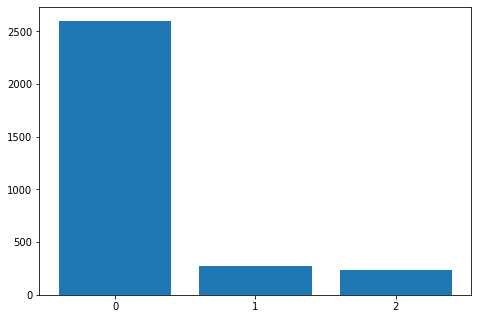

In [68]:
unique_kmean, counts_kmean = np.unique(y_cluster_pred, return_counts=True)
frequence_kmean = dict(zip(unique_kmean, counts_kmean))

f = np.array([frequence_kmean[0], frequence_kmean[1], frequence_kmean[2]])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
b = ["0", "1", "2"]
h = f
ax.bar(b,h)
plt.show()

If we plot the number of documents for each cluster, we see that most documents belong to the cluster, which we labeld with 0. Here the result is very different from the ground truth. Therefor we can conclude the k-Means we used in our approach does not work very well

#### Task 2: Topic modelling

For topic modeling we are using the Latent Dirichlet Allocation. Our idea is to use our corpus and find topics to them. Again we are using for the preprocessing our base pipeline. The result of the basepipeline will be fitted into the LDA algorithm. In our base pipeline we remove the TFID part and add it later manually. We do this beacause we also need to extract the names for building the vocabulary

In [69]:
lda_pipeline = Pipeline([("Remove_Punktuation", CleanText()),
                         ("Stopwords", Stop('english')),
                         ("Lower", Lower())])

In [70]:
lda_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('Remove_Punktuation',
                 <__main__.CleanText object at 0x7fc9406b4310>),
                ('Stopwords', <__main__.Stop object at 0x7fc9406b4650>),
                ('Lower', <__main__.Lower object at 0x7fc9406b4190>)],
         verbose=False)

In [71]:
X_lda = lda_pipeline.transform(X_train)

In [72]:
X_lda[1]

'heavy cycle cramps hot flashes fatigue long lasting cycles it months concidering changing different bc this first time using kind bc unfortunately due constant hassel happy results'

The pipeline returns a matrix of documents which are now preprocessed based on the steps in the pipleline

In [73]:
tfid = TfidfVectorizer(analyzer='word', lowercase = False)
X_dt_matrix = tfid.fit_transform(X_lda)

In [74]:
voc = np.array(tfid.get_feature_names())

We will extract 10 topics from the collection of documents. The maximum number of iteration is 100

In [75]:
n = 10
lda = LatentDirichletAllocation(n_components = n, max_iter=100)

In [76]:
topics = lda.fit_transform(X_dt_matrix)

In [77]:
# we are using just 5 topic terms since most reviews are short
# this code is based on the example from the lecture

topic_terms=lda.components_
top_terms=5 
topic_key_terms_idxs=np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keyterms=voc[topic_key_terms_idxs]
topics=[', '.join(topic) for topic in topic_keyterms]
pd.set_option('display.max_colwidth',-1)
topics_df=pd.DataFrame(topics,columns=['Term per Topic'], index=['Topic'+str(t) for t in range(1,n+1)])
topics_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


,Term per Topic
Topic1,"thirst, increased, annoying, urination, vomiting"
Topic2,"subsided, hyperactivity, apparent, strong, gastrointestinal"
Topic3,"none, noticed, far, tell, really"
Topic4,"side, effects, taking, the, drug"
Topic5,"weight, gain, stomach, constipation, dizziness"
Topic6,"noted, weakness, tolerated, well, motivation"
Topic7,"agitation, damage, sleeplessness, insomnia, afternoon"
Topic8,"aware, see, sleepiness, migraines, dysfunction"
Topic9,"tiredness, occassional, moody, hungry, dependency"
Topic10,"skin, dry, peeling, dryness, redness"


The dataframe above shows the result. In the first column we see the topic and in the second column we see the terms which are assosiated with the topic

In [78]:
# this code part is taken from scikit-learn and just visualize the result of the dataframe above
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


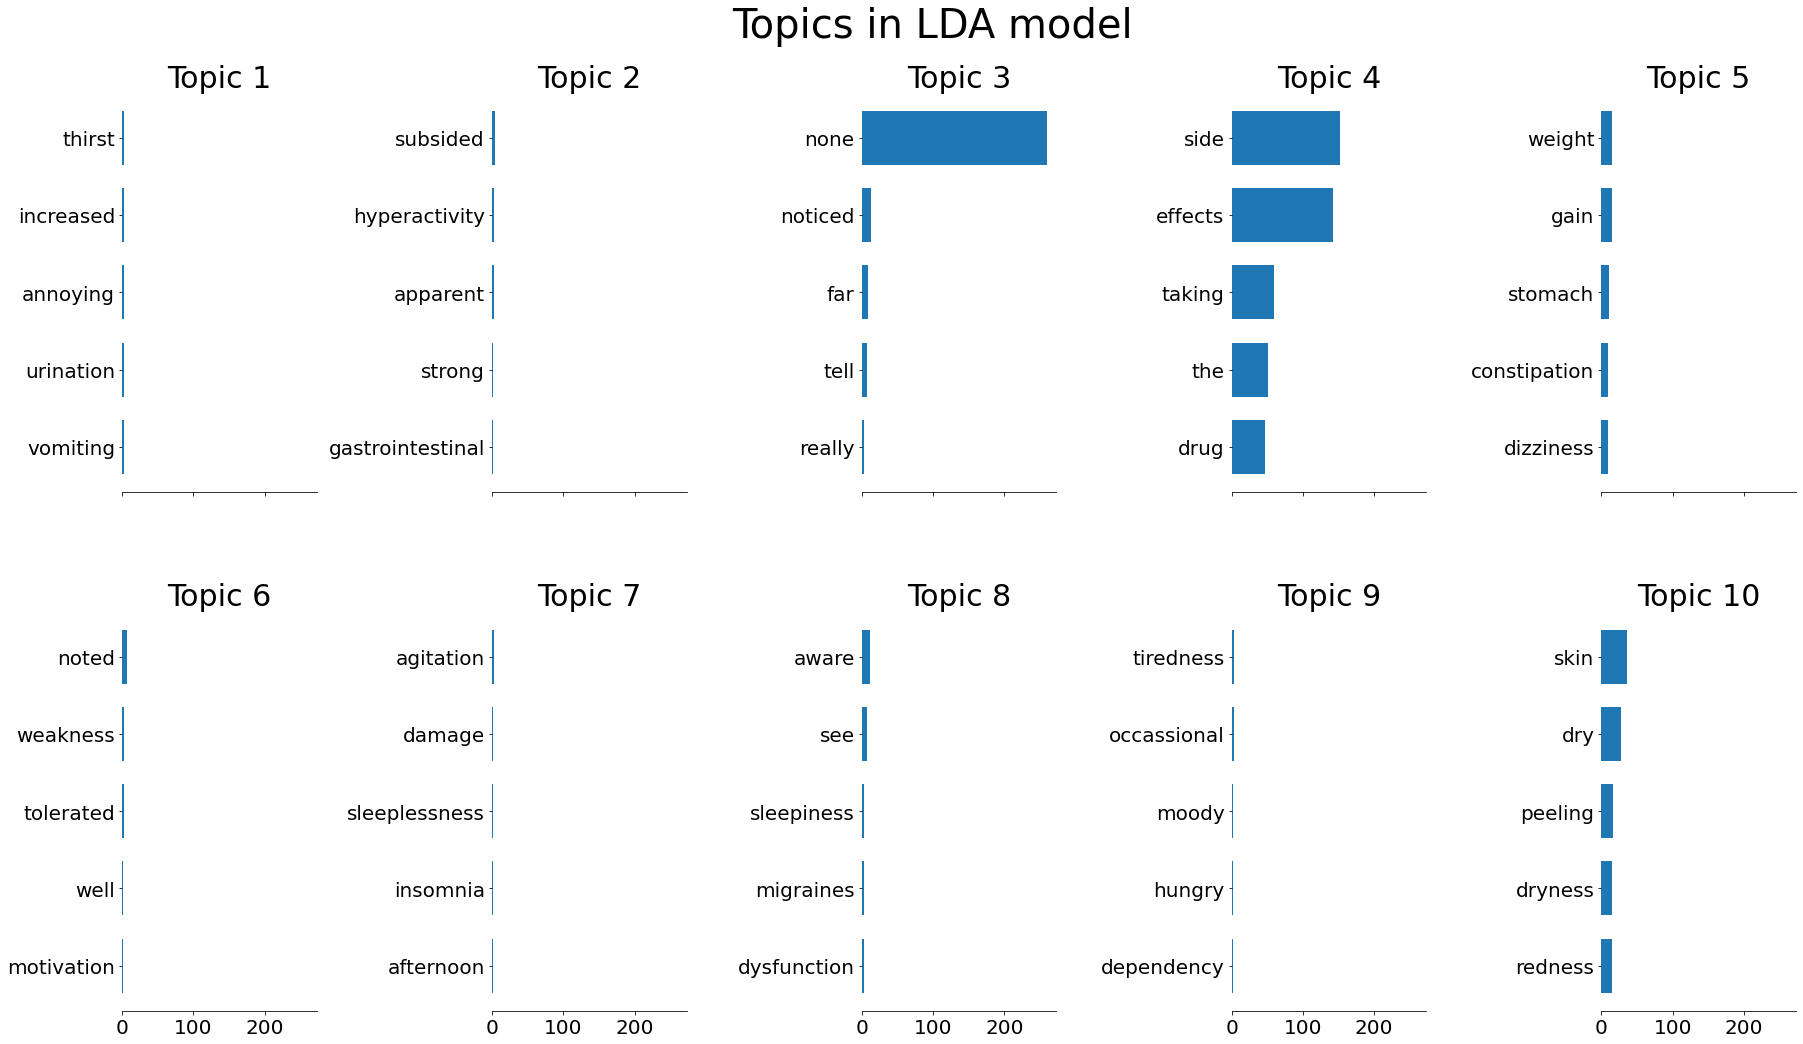

In [79]:
n_top_words = 5
plot_top_words(lda, voc, n_top_words, 'Topics in LDA model')

Above we see the result of the lda. What we see is that most topics describes a sickness or side effects. Our dataset is about one big topic. Side effects. Thats why also we just extract terms to topics which are related to side effects or describe a part of the body which is effected to side effects

#### Task 3: Document summarisation

To perform document summarization we are using the genesis chapter from the bible. The dataset was downloaded from Kaggle and can be found under the following link: https://www.kaggle.com/nltkdata/genesis.
Especially we use the english web file. The alternative would be to use the King James version of the bible. But here we have to take into account that special characters are included like ";". Another thing is that the sentences are written in an older style which can cause troubles if we use models which use data trained on modern english

In [80]:
bible = open("/Users/joel/Downloads/genesis/english-web.txt", "r")
genesis = bible.read(7500)

In [81]:
print(genesis)

In the beginning God created the heavens and the earth.
Now the earth was formless and empty.  Darkness was on the surface
of the deep.  God's Spirit was hovering over the surface
of the waters.
God said, "Let there be light," and there was light.
God saw the light, and saw that it was good.  God divided
the light from the darkness.
God called the light Day, and the darkness he called Night.
There was evening and there was morning, one day.
God said, "Let there be an expanse in the middle of the waters,
and let it divide the waters from the waters."
God made the expanse, and divided the waters which were under
the expanse from the waters which were above the expanse;
and it was so.
God called the expanse sky.  There was evening and there
was morning, a second day.
God said, "Let the waters under the sky be gathered together
to one place, and let the dry land appear;" and it was so.
God called the dry land Earth, and the gathering together
of the waters he called Seas.  God saw that it 

Above we see the genesis chapter. As we see the chapter contains many characters. We will now use TextRank, a variation of the PageRank algorithm, to extract keywords out of the chapter

In [82]:
#for spacy we are using the predefined pipeline
# https://spacy.io/models/en
# we use the python model pytextrank to extract keywords
# this example is partly taken from https://github.com/DerwenAI/pytextrank 
# and was modified to meet the requirements here
nlp = spacy.load("en_core_web_sm")

nlp.add_pipe("textrank", last=True)
doc = nlp(str(genesis))

# extract the 10 highest values of the textrank algorithm
# returns the pagerank value, the count and the text to it
for i in range(0, 10):
    p = doc._.phrases[i]
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))

0.0855     2  days
0.0742     1  fruit yielding seed
0.0741    12  Yahweh God
0.0734     2  herbs yielding seed
0.0676     4  man
0.0672    36  God
0.0661     1  trees
0.0651     4  sky
0.0617     2  light
0.0617     2  lights


Above is the output of the first 10 elements of the TextRank algorithm. Not surprising is the result that words like days, man or god achieving a high rank, since the chapter genesis is mainly about god creating things

In [83]:
text_rank_sentences = summarize(genesis, word_count=300)

In [84]:
print(genesis[0:450])

In the beginning God created the heavens and the earth.
Now the earth was formless and empty.  Darkness was on the surface
of the deep.  God's Spirit was hovering over the surface
of the waters.
God said, "Let there be light," and there was light.
God saw the light, and saw that it was good.  God divided
the light from the darkness.
God called the light Day, and the darkness he called Night.
There was evening and there was morning, one day.
God s


Shows the part of the genesis chapter

In [85]:
print(text_rank_sentences)

In the beginning God created the heavens and the earth.
God called the light Day, and the darkness he called Night.
God said, "Let there be an expanse in the middle of the waters,
God said, "Let the waters under the sky be gathered together
God called the dry land Earth, and the gathering together
God said, "Let the earth put forth grass, herbs yielding seed,
The earth brought forth grass, herbs yielding seed after their kind,
God said, "Let there be lights in the expanse of sky to
God set them in the expanse of sky to give light to the earth,
God said, "Let the waters swarm with swarms of living creatures,
and let birds fly above the earth in the open expanse of sky."
the waters in the seas, and let birds multiply on the earth."
God said, "Let the earth bring forth living creatures after
their kind, livestock, creeping things, and animals of the earth
God made the animals of the earth after their kind,
God said, "Let us make man in our image, after our likeness:
God created man in his

We not used the complete genesis chapter. We focused on the first 7500 characters which belongs to the story of creating the earth, elements, animals humans, ... . The summarization works well. In the original corpus the tale starts with creating heaven and earth and the creation of night and day. To tell this a lot of fill words and sentences are used. For the same story genesis needed 9 sentences. Through summarization we could reduce the same story to two sentences. We used 300 words to summarize the text. If we use change the amount of words, the result of the summarization will change as well